<a href="https://colab.research.google.com/github/AbhinayPoloju/dl-for-emo-tts/blob/master/Demo_DL_Based_Emotional_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Based Emotional Text to Speech

In this demo, we provide an interface to generate emotional speech from user inputs for both the emotional label and the text.

The models that are trained are [Tacotron](https://github.com/Emotional-Text-to-Speech/tacotron_pytorch) and [DC-TTS](https://github.com/Emotional-Text-to-Speech/pytorch-dc-tts).

Further information about our approaches and *exactly how* did we develop this demo can be seen [here](https://github.com/Emotional-Text-to-Speech/dl-for-emo-tts).

---
---


## Download the required code and install the dependences

- Make sure you have clicked on ```Open in Playground``` to be able to run the cells. Set your runtime to ```GPU```. This can be done with the following steps:
  - Click on ```Runtime``` on the menubar above
  - Select ```Change runtime type```
  - Select ```GPU``` from the ```Hardware accelerator``` dropdown and save.
- Run the cell below. It will automatically create the required directory structure. In order to run the cell, click on the **arrow** that is on the left column of the cell (hover over the ```[]``` symbol). Optionally, you can also press ```Shift + Enter ```




In [1]:
! git clone https://github.com/Emotional-Text-to-Speech/pytorch-dc-tts
! git clone --recursive https://github.com/Emotional-Text-to-Speech/tacotron_pytorch.git
! cd "tacotron_pytorch/" && pip install -e .
! pip install unidecode
! pip install gdown
! mkdir trained_models

import gdown
url = 'https://drive.google.com/uc?id=1QDqQ28-9HKwbk-tvbuxdVgZWqP4esAWi'
output = 'trained_models/angry_dctts.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=15W26uWXF-OGaA5Kl0uZMBrCwtLA7TSZD'
output = 'trained_models/neutral_dctts.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1SGLBcq57nbNuUjvLauSdpZ82aJxsPhVi'
output = 'trained_models/ssrn.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1noCgRVdyOgpbTu0DYfOHRemyZcTv_EX-'
output = 'trained_models/disgust_tacotron.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1vq581_o3eOHPdxziiaIDbDX-QKiqJCCs'
output = 'trained_models/amused_tacotron.pth'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/uc?id=1-kytGBfrb-P8BNguS58a87V5fACO9vJU'
output = 'trained_models/sleepiness_tacotron.pth'
gdown.download(url, output, quiet=False)

Cloning into 'pytorch-dc-tts'...
remote: Enumerating objects: 1904, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 1904 (delta 139), reused 129 (delta 129), pack-reused 1734
Receiving objects: 100% (1904/1904), 277.55 MiB | 14.43 MiB/s, done.
Resolving deltas: 100% (235/235), done.
Cloning into 'tacotron_pytorch'...
remote: Enumerating objects: 150, done.
remote: Total 150 (delta 0), reused 0 (delta 0), pack-reused 150
Receiving objects: 100% (150/150), 21.19 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Submodule 'lib/tacotron' (https://github.com/r9y9/tacotron) registered for path 'lib/tacotron'
Cloning into '/content/tacotron_pytorch/lib/tacotron'...
remote: Enumerating objects: 212, done.        
remote: Total 212 (delta 0), reused 0 (delta 0), pack-reused 212        
Receiving objects: 100% (212/212), 62.01 KiB | 12.40 MiB/s, done.
Resolving deltas: 100% (111/111), done.
Submodule path 'lib/taco

Downloading...
From (original): https://drive.google.com/uc?id=1QDqQ28-9HKwbk-tvbuxdVgZWqP4esAWi
From (redirected): https://drive.google.com/uc?id=1QDqQ28-9HKwbk-tvbuxdVgZWqP4esAWi&confirm=t&uuid=54d7e4c4-4f78-448e-9d64-f6a70dbae9f4
To: /content/trained_models/angry_dctts.pth
100%|██████████| 288M/288M [00:01<00:00, 173MB/s]
Downloading...
From: https://drive.google.com/uc?id=15W26uWXF-OGaA5Kl0uZMBrCwtLA7TSZD
To: /content/trained_models/neutral_dctts.pth
100%|██████████| 95.9M/95.9M [00:00<00:00, 226MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SGLBcq57nbNuUjvLauSdpZ82aJxsPhVi
From (redirected): https://drive.google.com/uc?id=1SGLBcq57nbNuUjvLauSdpZ82aJxsPhVi&confirm=t&uuid=bbf05937-bbc4-43f7-94da-5de52bfb9e60
To: /content/trained_models/ssrn.pth
100%|██████████| 331M/331M [00:02<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1noCgRVdyOgpbTu0DYfOHRemyZcTv_EX-
To: /content/trained_models/disgust_tacotron.pth
100%|██████████| 25.8M/25.8M [00:0

'trained_models/sleepiness_tacotron.pth'

## Setup the required code

- Run the cell below. It will automatically create the required directory structure. In order to run the cell, click on the **arrow** that is on the left column of the cell (hover over the ```[]``` symbol). Optionally, you can also press ```Shift + Enter ```

In [3]:
!pip install docopt

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f20c324c385d98eeec82839532938a1c5aed7fc96c9d53fcc993a3dc2ecebac9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [4]:

%pylab inline
rcParams["figure.figsize"] = (10,5)

import os
import sys
import numpy as np
sys.path.append('pytorch-dc-tts/')
sys.path.append('pytorch-dc-tts/models')
sys.path.append("tacotron_pytorch/")
sys.path.append("tacotron_pytorch/lib/tacotron")

# For the DC-TTS
import torch
from text2mel import Text2Mel
from ssrn import SSRN
from audio import save_to_wav, spectrogram2wav
from utils import get_last_checkpoint_file_name, load_checkpoint_test, save_to_png, load_checkpoint
from datasets.emovdb import vocab, get_test_data

# For the Tacotron
from text import text_to_sequence, symbols
# from util import audio

from tacotron_pytorch import Tacotron
from synthesis import tts as _tts

# For Audio/Display purposes
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import display
from google.colab import widgets
from google.colab import output
import warnings
warnings.filterwarnings('ignore')


torch.set_grad_enabled(False)
text2mel = Text2Mel(vocab).eval()

ssrn = SSRN().eval()
load_checkpoint('trained_models/ssrn.pth', ssrn, None)

model = Tacotron(n_vocab=len(symbols),
                 embedding_dim=256,
                 mel_dim=80,
                 linear_dim=1025,
                 r=5,
                 padding_idx=None,
                 use_memory_mask=False,
                 )

def visualize(alignment, spectrogram, Emotion):
    label_fontsize = 16
    tb = widgets.TabBar(['Alignment', 'Spectrogram'], location='top')
    with tb.output_to('Alignment'):
      imshow(alignment.T, aspect="auto", origin="lower", interpolation=None)
      xlabel("Decoder timestamp", fontsize=label_fontsize)
      ylabel("Encoder timestamp", fontsize=label_fontsize)
    with tb.output_to('Spectrogram'):
      if Emotion == 'Disgust' or Emotion == 'Amused' or Emotion == 'Sleepiness':
        librosa.display.specshow(spectrogram.T, sr=fs,hop_length=hop_length, x_axis="time", y_axis="linear")
      else:
        librosa.display.specshow(spectrogram, sr=fs,hop_length=hop_length, x_axis="time", y_axis="linear")

      xlabel("Time", fontsize=label_fontsize)
      ylabel("Hz", fontsize=label_fontsize)

def tts_dctts(text2mel, ssrn, text):
  sentences = [text]

  max_N = len(text)
  L = torch.from_numpy(get_test_data(sentences, max_N))
  zeros = torch.from_numpy(np.zeros((1, 80, 1), np.float32))
  Y = zeros
  A = None

  for t in range(210):
      _, Y_t, A = text2mel(L, Y, monotonic_attention=True)
      Y = torch.cat((zeros, Y_t), -1)
      _, attention = torch.max(A[0, :, -1], 0)
      attention = attention.item()
      if L[0, attention] == vocab.index('E'):  # EOS
          break

  _, Z = ssrn(Y)
  Y = Y.cpu().detach().numpy()
  A = A.cpu().detach().numpy()
  Z = Z.cpu().detach().numpy()

  return spectrogram2wav(Z[0, :, :].T), A[0, :, :], Y[0, :, :]


def tts_tacotron(model, text):
    waveform, alignment, spectrogram = _tts(model, text)
    return waveform, alignment, spectrogram

def present(waveform, Emotion, figures=False):
  if figures!=False:
        visualize(figures[0], figures[1], Emotion)
  IPython.display.display(Audio(waveform, rate=fs))


fs = 20000 #20000
hop_length = 250
model.decoder.max_decoder_steps = 200

Populating the interactive namespace from numpy and matplotlib
trained_models/ssrn.pth
loaded checkpoint epoch=0 step=0


## Run the Demo

- Select an ```Emotion``` from the dropdown and enter the ```Text``` that you want to be generated.
- Run the cell below. It will automatically create the required directory structure. In order to run the cell, click on the **arrow** that is on the left column of the cell (hover over the ```[]``` symbol). Optionally, you can also press ```Shift + Enter ```

**Play the speech with the generated audio player and view the required plots by clicking on their respective tabs!**




Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

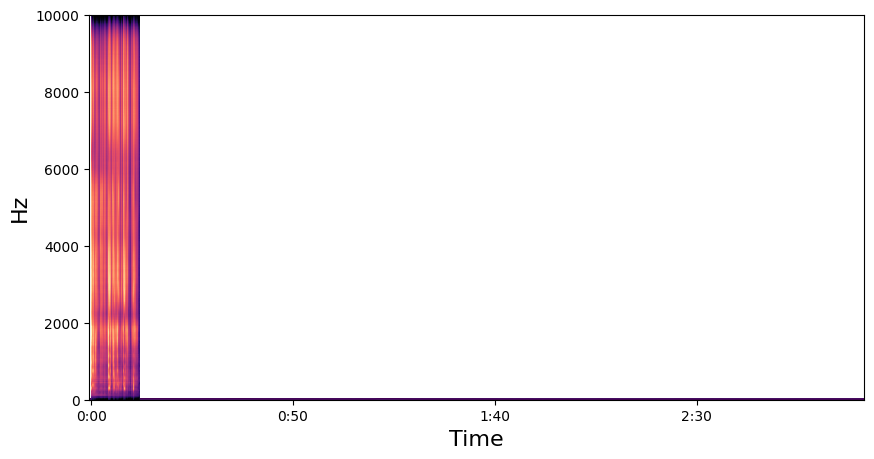

In [11]:
#@title Select the emotion and type the text

%pylab inline

Emotion = "Amused" #@param ["Neutral", "Angry", "Disgust", "Sleepiness", "Amused"]
Text = 'I am not happy at all. Dont be mad at me.' #@param {type:"string"}

wav, align, mel = None, None, None

if Emotion == "Neutral":
  load_checkpoint('trained_models/'+Emotion.lower()+'_dctts.pth', text2mel, None)
  wav, align, mel = tts_dctts(text2mel, ssrn, Text)
elif Emotion == "Angry":
  load_checkpoint_test('trained_models/'+Emotion.lower()+'_dctts.pth', text2mel, None)
  wav, align, mel = tts_dctts(text2mel, ssrn, Text)
  # wav = wav.T
elif Emotion == "Disgust" or Emotion == "Amused" or Emotion == "Sleepiness":
  checkpoint = torch.load('trained_models/'+Emotion.lower()+'_tacotron.pth', map_location=torch.device('cpu'))
  model.load_state_dict(checkpoint["state_dict"])
  wav, align, mel = tts_tacotron(model, Text)

present(wav, Emotion, (align,mel))

